In [1]:
import numpy as np
import tensorflow as tf
import cv2
import sys
sys.path.insert(0, '../')
import matplotlib.pyplot as plt

In [2]:
RAW = True
if RAW:
    from input_data import image_generator_xd_raw as image_generator_xd
    from input_data import df_to_image_array_xd_raw as df_to_image_array_xd
else:
    from input_data import image_generator_xd
    from input_data import df_to_image_array_xd

Using TensorFlow backend.


# Image blur

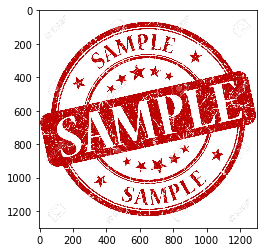

In [2]:
img = cv2.imread('/root/sample.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
input_img = tf.placeholder(tf.float32, (None, 1300, 1300, 1))
blur_size = 17
filts = tf.ones((blur_size,blur_size,1,1))/blur_size**2
convolved = tf.nn.conv2d(input_img, filts, [1,1,1,1], padding='VALID')
convolved = tf.squeeze(convolved, axis=-1)

In [4]:
with tf.Session() as sess:
    imgs = np.split(img, indices_or_sections=3, axis=-1)
    feed_dict0 = {input_img: [imgs[0]]}
    feed_dict1 = {input_img: [imgs[1]]}
    feed_dict2 = {input_img: [imgs[2]]}
    conv0 = sess.run(convolved, feed_dict=feed_dict0)
    conv1 = sess.run(convolved, feed_dict=feed_dict1)
    conv2 = sess.run(convolved, feed_dict=feed_dict2)
    

In [5]:
conv0 = np.squeeze(conv0, axis=0).astype(np.uint8)
conv1 = np.squeeze(conv1, axis=0).astype(np.uint8)
conv2 = np.squeeze(conv2, axis=0).astype(np.uint8)

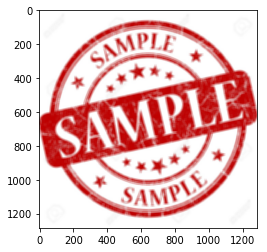

In [6]:
blurred = np.stack([conv0, conv1, conv2], axis=-1)
#convolved
plt.imshow(blurred)

In [82]:
img[130,130,:], blurred[130,130,:]

(array([255, 255, 255], dtype=uint8), array([255, 255, 255], dtype=uint8))

In [77]:
img[500,1000,:], blurred[500,1000,:]

(array([177,   0,   0], dtype=uint8), array([194,  41,  34], dtype=uint8))

# Image calculation

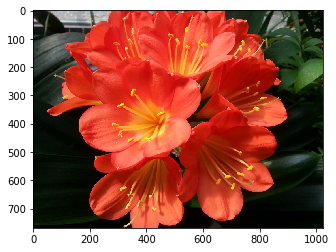

In [10]:
f1 = cv2.imread('/data/image/flower1.jpg')
f1 = cv2.cvtColor(f1, cv2.COLOR_BGR2RGB)
plt.imshow(f1)

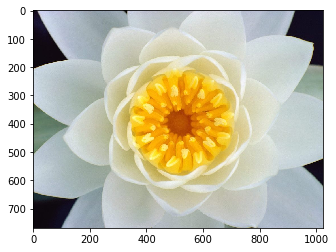

In [11]:
f2 = cv2.imread('/data/image/flower2.jpg')
f2 = cv2.cvtColor(f2, cv2.COLOR_BGR2RGB)
plt.imshow(f2)

(array([196, 218, 216], dtype=uint8), array([197, 217, 216], dtype=uint8))

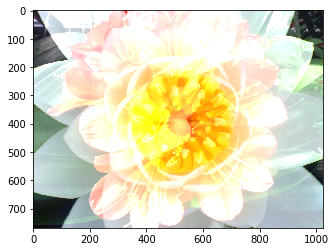

In [23]:
opencv_add = cv2.add(f1, f2)
opencv_add_jpg = cv2.imread('/data/image/flower_add_opencv.jpg')
opencv_add_jpg = cv2.cvtColor(opencv_add_jpg, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_add)
opencv_add_jpg[500,1000,:], opencv_add[500,1000,:]

(array([200, 215, 220], dtype=uint8), array([197, 217, 216], dtype=uint8))

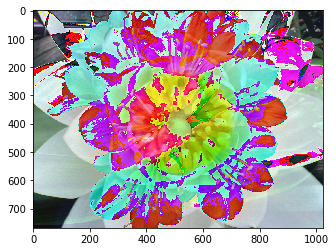

In [27]:
numpy_add = f1 + f2
numpy_add_jpg = cv2.imread('/data/image/flower_add_numpy.jpg')
numpy_add_jpg = cv2.cvtColor(numpy_add_jpg, cv2.COLOR_BGR2RGB)
plt.imshow(numpy_add)
numpy_add_jpg[500,1000,:], numpy_add[500,1000,:]
#print(f1[500,1000,:])
#print(f2[500,1000,:])

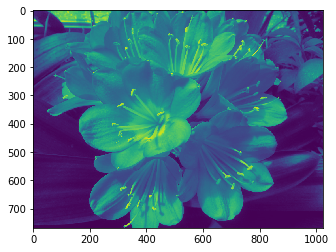

In [37]:
f1_bgr = cv2.imread('/data/image/flower1.jpg')

# grayscale image
gray_f1 = cv2.cvtColor(f1_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_f1)

# hsv image
hsv_f1 = cv2.cvtColor(f1, cv2.COLOR_BGR2HSV)
#plt.imshow(hsv_f1)

In [60]:
f1_b, f1_g, f1_r = f1_bgr[:,:,0], f1_bgr[:,:,1], f1_bgr[:,:,2]
template = np.zeros(img.shape, np.uint8)
template[:,:,0] = f1_r
#tmp = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

IndexError: too many indices for array

In [51]:
f1_gray = cv2.cvtColor(f1_bgr, cv2.COLOR_BGR2GRAY)
f1_bgr.shape, template.shape, f1_gray.shape

((768, 1024, 3), (768, 1024, 3), (768, 1024))

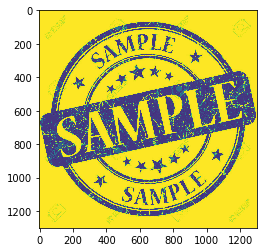

In [59]:
img = cv2.imread('/root/sample.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

# Raw image preprocessing

In [3]:
from input_data import image_generator_xd_raw

In [4]:
NCSVS = 100
SIZE = 128
NCATS = 340
BATCHSIZE = 8*8

In [5]:
gen = image_generator_xd(SIZE, BATCHSIZE, ks=range(NCSVS-1))

In [6]:
x, y = next(gen)

5.357061993998872
9.75
9.75
9.458889376416986
14.740614447359862
9.75
9.75
14.740614447359862
12.33288287465668
15.921683328090658
12.33288287465668
15.921683328090658
13.0
14.740614447359862
13.0
14.740614447359862
13.788582233137676
13.0
13.788582233137676
8.72066511224918
19.5
13.788582233137676
9.75
13.788582233137676
11.758942438532781
10.816653826391969
13.788582233137676
14.740614447359862
9.19238815542512
14.740614447359862
14.740614447359862
13.0
9.458889376416986
9.458889376416986
15.921683328090658
10.069756700139283
7.960841664045329
3.6526846651686067
3.443784128369114
3.443784128369114
4.669737852696148
5.421374765483944
5.30722777603022
6.305926250944657
5.813776741499453
7.505553499465135
6.5
6.5
5.30722777603022
4.913538149119954
4.333333333333333
4.060517809103758
4.669737852696148
5.30722777603022
4.669737852696148
3.8334908600273256
5.003702332976757
4.669737852696148
4.394802124588286
4.669737852696148
4.74692883171144
3.3849116855014207
2.7716093126229358
0.460287

20.50609665440988
21.75
21.100599378160968
21.75
21.100599378160968
21.100599378160968
21.75
21.100599378160968
21.100599378160968
18.548462322938107
26.231486978265437
21.100599378160968
21.100599378160968
15.144756068145712
8.077747210701757
10.708959715201948
14.920376907398268
21.100599378160968
21.100599378160968
22.463303408003018
20.50609665440988
15.144756068145712
21.100599378160968
21.75
14.920376907398268
15.144756068145712
12.303657992645926
15.144756068145712
9.49247822526567
27.5118156434649
1.5434872662825794
1.52127765851133
3.6742346141747673
1.9639610121239315
2.7136021011998728
2.32379000772445
2.182820625326997
6.363961030678928
0.5039526306789696
0.5773502691896258
0.3417430630867044
2.2677868380553634
4.6475800154489
4.242640687119286
4.129483209670111
4.365641250653994
4.6475800154489
4.365641250653994
4.6475800154489
4.5
4.024922359499621
5.196152422706632
4.365641250653994
4.365641250653994
4.365641250653994
4.365641250653994
4.5
4.9923017660270625
2.8333333333

17.441967269268172
19.777331901519403
17.441967269268172
20.523907260333477
26.162950903902257
21.361959960016154
15.430066640223535
17.94763625268864
14.8
19.10671784128992
26.162950903902257
17.441967269268172
13.081475451951128
15.776853010315172
23.400854685246006
22.31183949875451
37.0
23.400854685246006
22.31183949875451
26.162950903902257
23.400854685246006
20.523907260333477
21.361959960016154
17.94763625268864
16.54690303349844
16.54690303349844
16.97676430642157
17.441967269268172
13.510489751794097
11.4184478971948
1.4572334788100036
4.608176875690327
6.717514421272201
3.9617738670844207
6.717514421272201
5.269651864139677
3.5282114253639856
7.181324987175317
7.756717518813398
7.756717518813398
6.00832755431992
6.00832755431992
5.269651864139677
4.608176875690327
9.5
5.484827557301445
4.905778905196061
1.4927809825049336
1.7670825235854974
6.957010852370434
4.4
6.10170215847752
8.981462390204987
6.10170215847752
11.0
6.6332495807108
5.335783750799325
6.10170215847752
4.31455

55.74736972063553
100.5
55.74736972063553
89.88993269549154
50.25
41.91139722547203
46.11256250798291
43.86179593743447
37.985429537427336
37.324762973587426
37.324762973587426
31.78089048469221
47.37615433949869
37.324762973587426
46.11256250798291
26.392593004804233
26.392593004804233
25.52702552703829
29.318863291076806
14.858347546186915
28.425692603699208
27.352635461078822
42.85334398747769
48.74966063230293
29.011851026778697
29.318863291076806
34.98960884709527
36.69741135284613
48.74966063230293
33.044196448376816
25.323619691618223
17.42891038743481
47.37615433949869
47.37615433949869
46.11256250798291
37.324762973587426
51.897976839179385
48.74966063230293
47.37615433949869
46.11256250798291
47.37615433949869
44.94496634774577
12.23247045094871
29.011851026778697
36.69741135284613
46.11256250798291
43.86179593743447
38.68246803570492
32.185758914822514
43.86179593743447
48.74966063230293
100.5
58.02370205355739
100.5
53.719509624397304
89.88993269549154
60.60378026013049
37.

2.14422506967559
6.5858555993814205
8.48528137423857
8.40168050416806
7.385489458759963
13.416407864998737
0.7504787743864564
1.9603921176392136
1.979898987322333
1.979898987322333
1.979898987322333
1.9414506867883021
1.5366996398556647
2.0
2.4009801919951235
2.4370871833797696
2.4370871833797696
2.4370871833797696
2.3333333333333335
4.185789451624787
5.048252022715237
7.25
6.83536555146996
7.25
7.033533126053656
7.25
7.033533126053656
7.033533126053656
7.033533126053656
7.25
6.653056282246291
7.25
7.033533126053656
7.033533126053656
7.487767802667673
6.653056282246291
7.25
7.487767802667673
7.033533126053656
6.653056282246291
8.043152845265823
7.033533126053656
6.653056282246291
7.750576015460307
7.033533126053656
6.484597134749389
7.487767802667673
23.60224645528152
33.378617039531434
34.02680604188063
58.936156883828914
41.074496779805905
41.074496779805905
41.67415618962965
41.67415618962965
40.5
41.67415618962965
41.67415618962965
41.074496779805905
41.67415618962965
41.0744967798

84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
79.33333333333333
89.95554457619608
79.33333333333333
89.95554457619608
84.14570696119915
84.14570696119915
79.33333333333333
59.5
89.95554457619608
59.5
59.5
59.5
59.5
59.5
59.5
59.5
84.14570696119915
59.5
57.723478758647246
48.5815465651997
59.5
61.451335759824346
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
79.33333333333333
89.95554457619608
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
84.14570696119915
79.33333333333333
89.95554457619608
84.14570696119915
84.14570696119915
79.33333333333333
89.95554457619608
79.33333333333333
89.95554457619608
84.14570696119915
89.95554457619608
79.33333333333333
89.95554457619608
79.33333333333333
84.14570696119915
89.95554457619608
79.3333333333

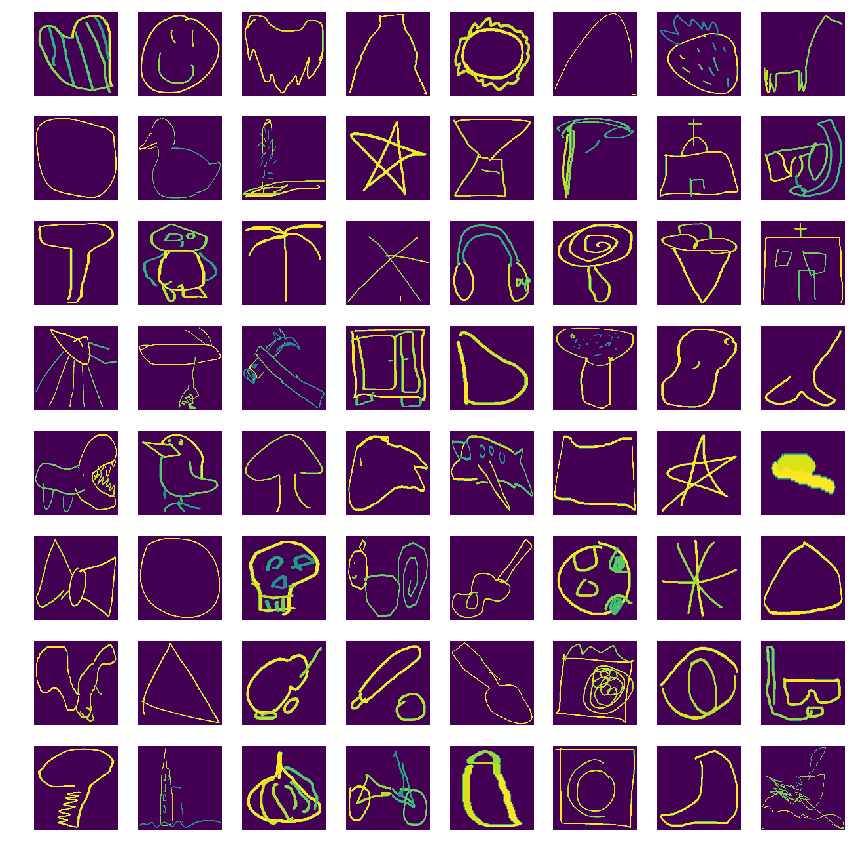

In [7]:
n = 8
layer = 0
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(12, 12))
for i in range(n**2):
    ax = axs[i // n, i % n]
    a = (-x[i]+1)/2
    #a = ax.imshow((-x[i, :, :, 0] + 1)/2)
    a = ax.imshow(x[i, :, :, layer])
    a = ax.axis('off')
plt.tight_layout()

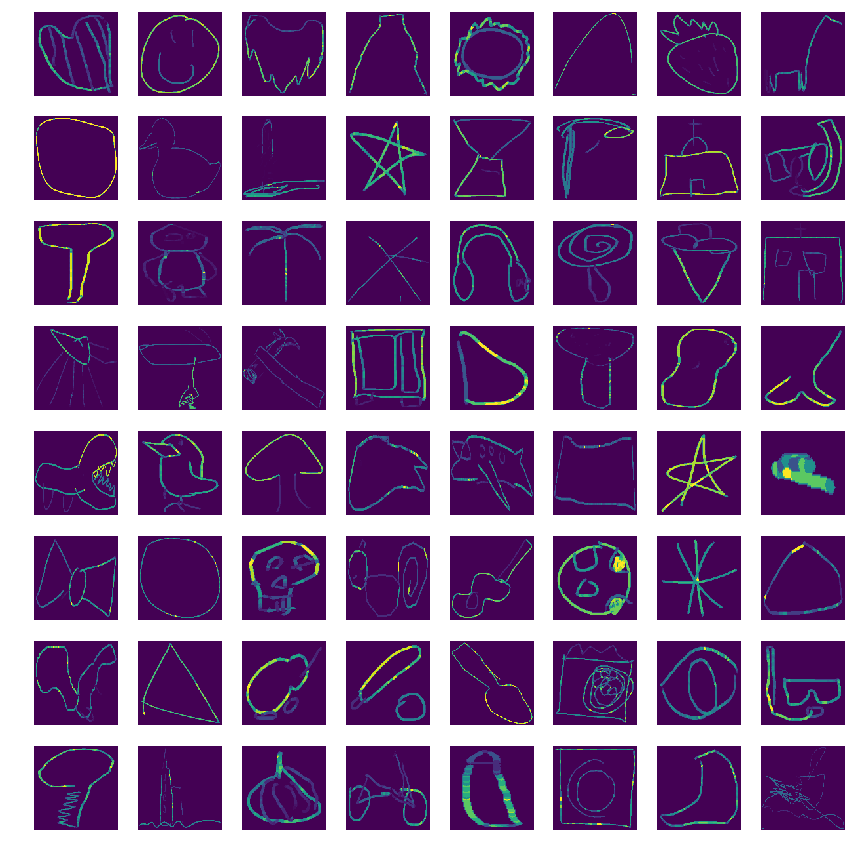

In [9]:
n = 8
layer = 1
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(12, 12))
for i in range(n**2):
    ax = axs[i // n, i % n]
    a = (-x[i]+1)/2
    #a = ax.imshow((-x[i, :, :, 0] + 1)/2)
    a = ax.imshow(x[i, :, :, layer])
    a = ax.axis('off')
plt.tight_layout()

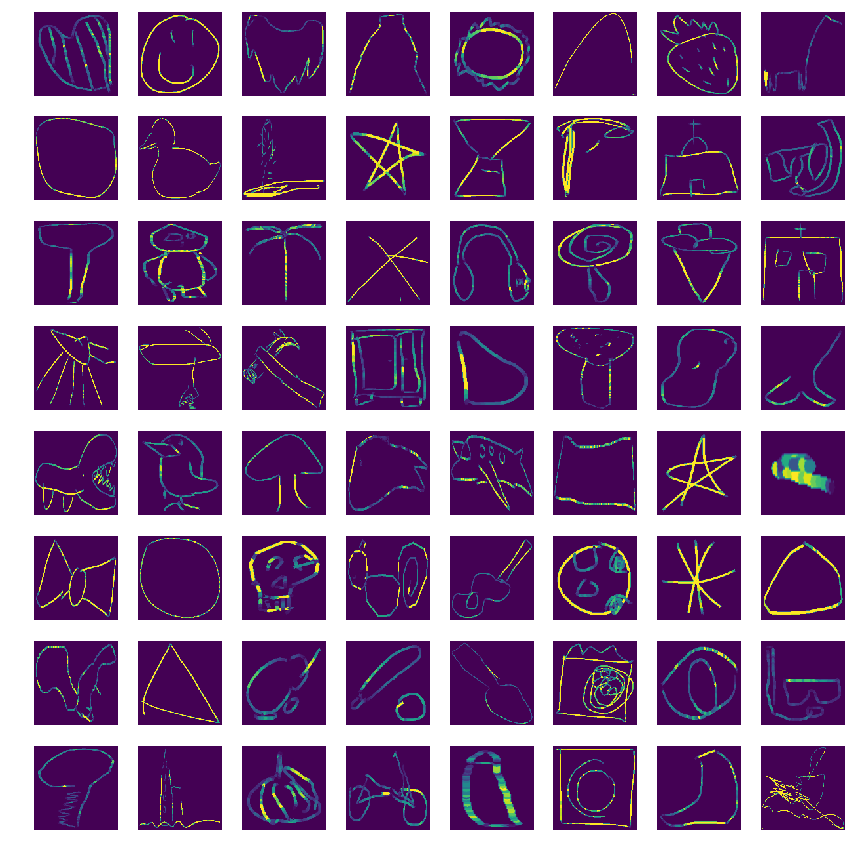

In [10]:
n = 8
layer = 2
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(12, 12))
for i in range(n**2):
    ax = axs[i // n, i % n]
    #a = (-x[i]+1)/2
    a = ax.imshow(x[i, :, :, layer])
    a = ax.axis('off')
plt.tight_layout()

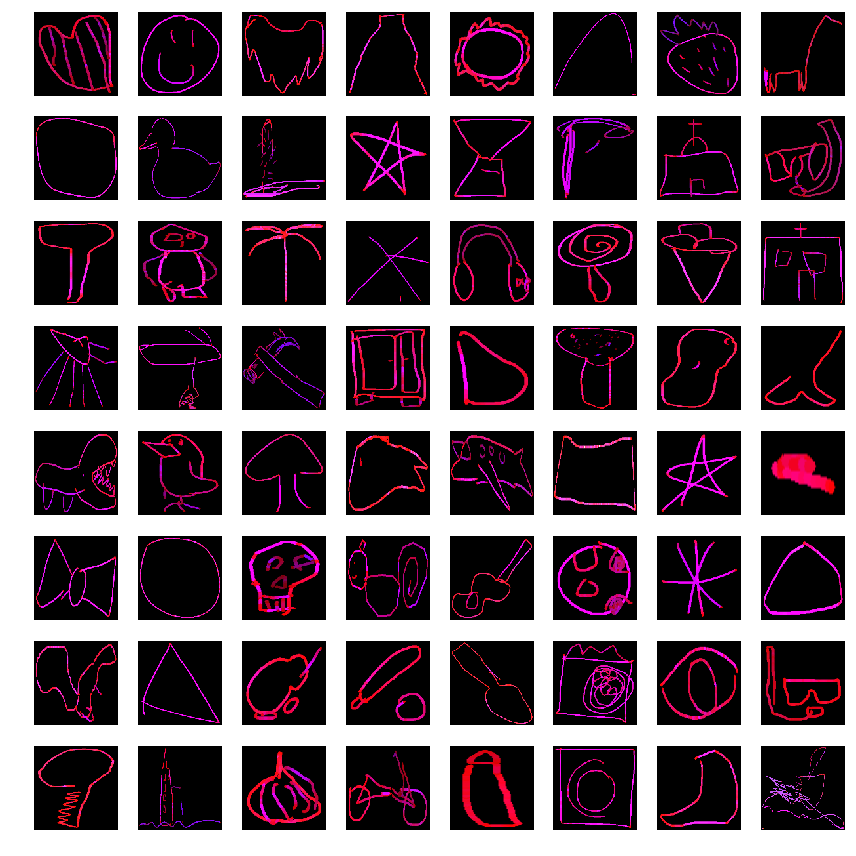

In [11]:
n = 8
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(12, 12))
for i in range(n**2):
    ax = axs[i // n, i % n]
    a = ax.imshow(x[i])
    a = ax.axis('off')
plt.tight_layout()

Text(0.5,1,'grayscale image')

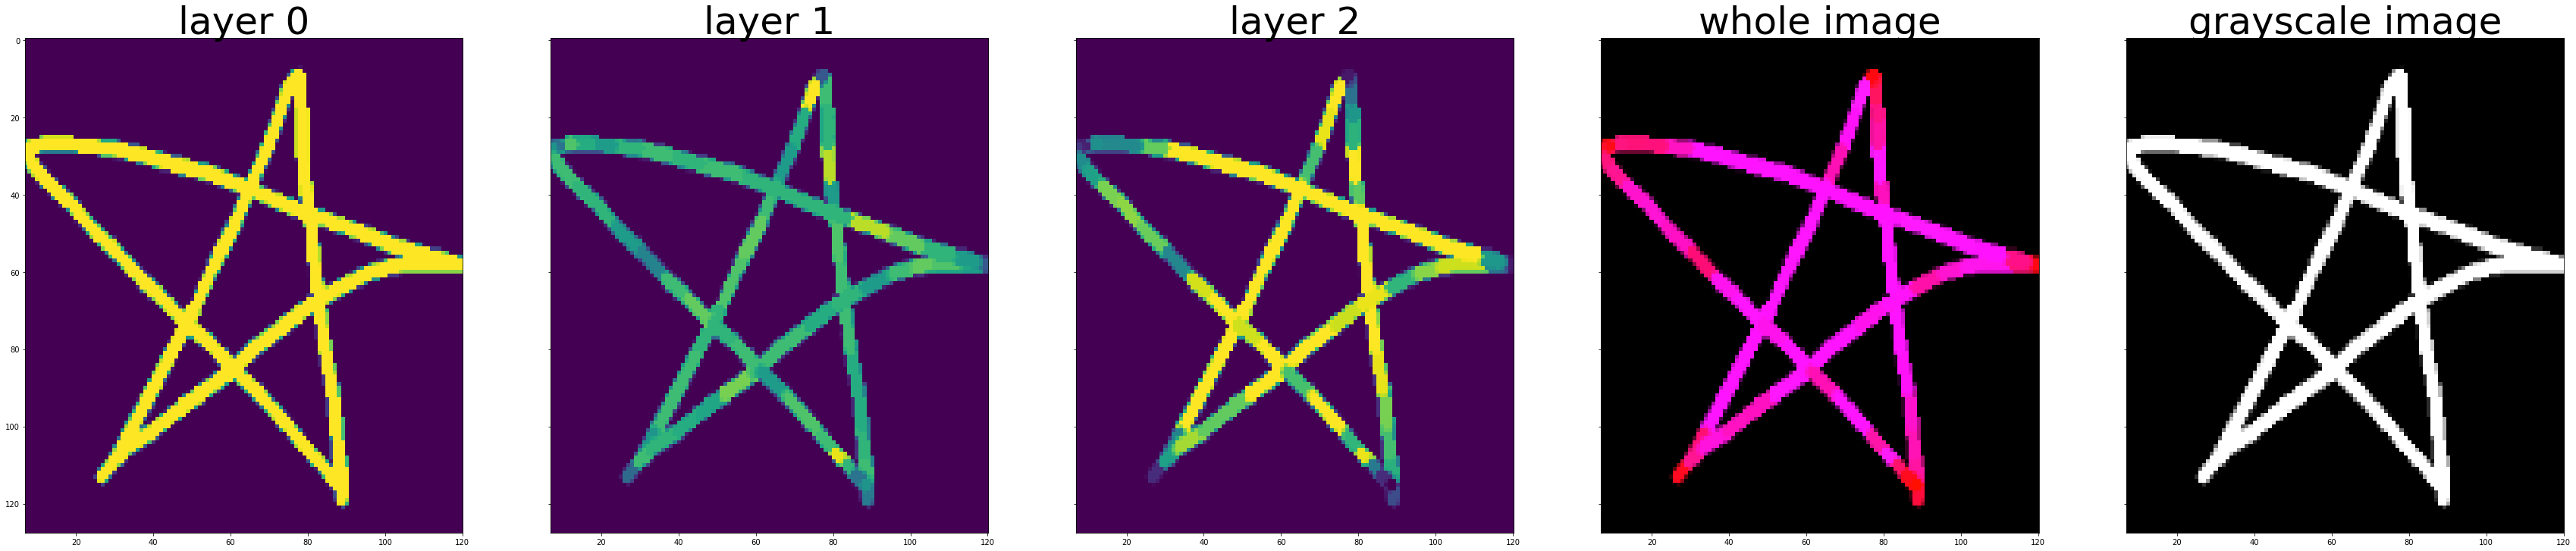

In [25]:
font = {'fontsize':50}
idx = np.random.randint(0, BATCHSIZE)
fig, axs = plt.subplots(1, 5, figsize=(60, 12), sharey=True)
axs[0].imshow(x[idx,:,:,0])
axs[1].imshow(x[idx,:,:,1])
axs[2].imshow(x[idx,:,:,2])
axs[3].imshow(x[idx].reshape((SIZE, SIZE, 3)))
gray_img = x[idx,:,:,0].reshape((SIZE, SIZE)).copy()
#gray_img[:,:] = 0
axs[4].imshow(gray_img, cmap='gray')

axs[0].set_title('layer 0', fontdict=font)
axs[1].set_title('layer 1', fontdict=font)
axs[2].set_title('layer 2', fontdict=font)
axs[3].set_title('whole image', fontdict=font)
axs[4].set_title('grayscale image', fontdict=font)

# Select good features

In [2]:
from input_data import image_extractor_xd_raw
gen = image_extractor_xd_raw(128, 100, ks=range(99))
x, y = next(gen)

Using TensorFlow backend.


(100, 128, 128, 6)
(100, 340)
708.145
91.0392
275.682
158.792
69.6902
1.07843


Text(0.5,1,'layer 5')

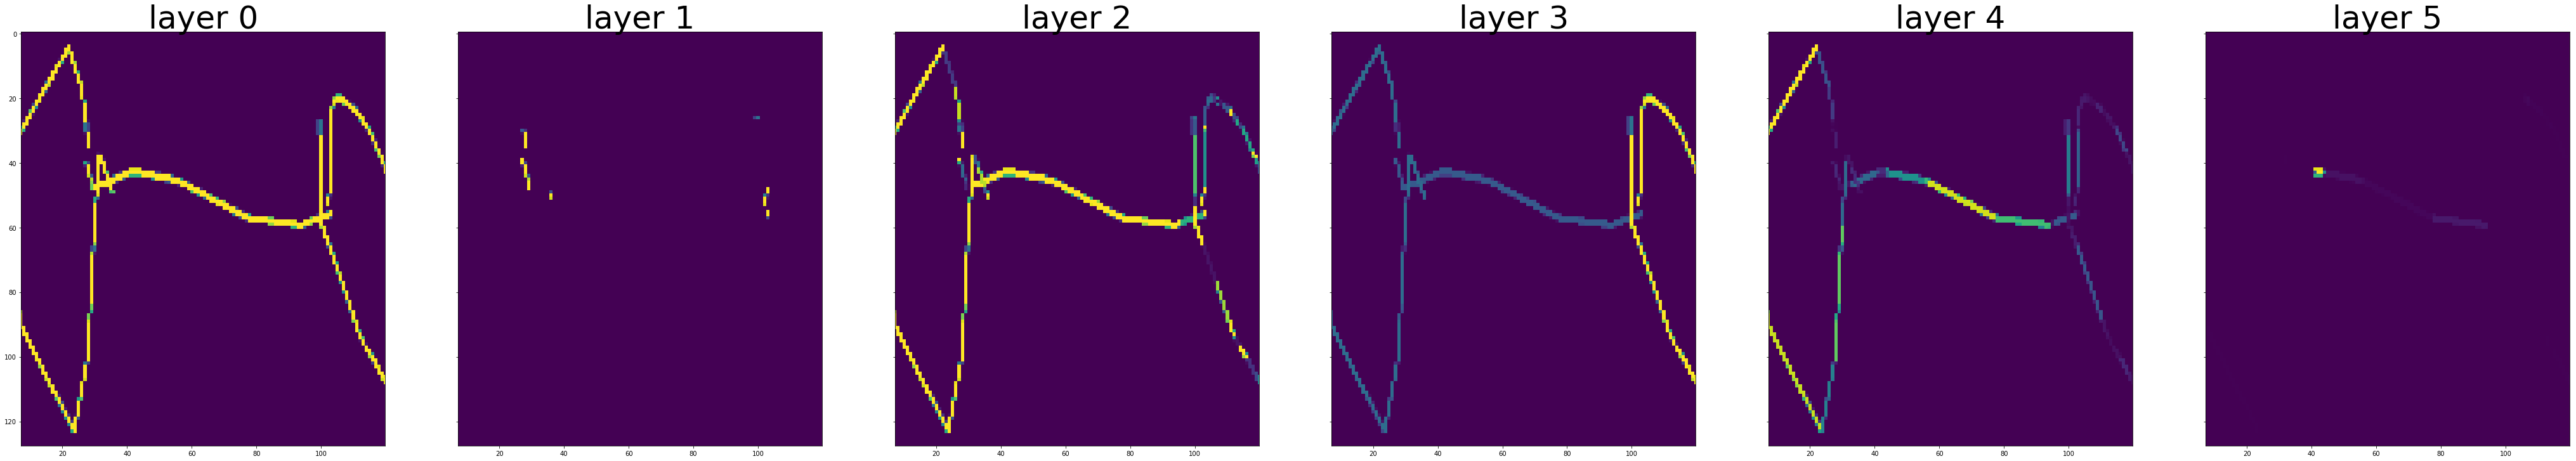

In [3]:
font = {'fontsize':50}
idx = np.random.randint(0, 100)
fig, axs = plt.subplots(1, 6, figsize=(12*6, 12), sharey=True)
axs[0].imshow(x[idx,:,:,0])
axs[1].imshow(x[idx,:,:,1])
axs[2].imshow(x[idx,:,:,2])
axs[3].imshow(x[idx,:,:,3])
axs[4].imshow(x[idx,:,:,4])
axs[5].imshow(x[idx,:,:,5])

axs[0].set_title('layer 0', fontdict=font)
axs[1].set_title('layer 1', fontdict=font)
axs[2].set_title('layer 2', fontdict=font)
axs[3].set_title('layer 3', fontdict=font)
axs[4].set_title('layer 4', fontdict=font)
axs[5].set_title('layer 5', fontdict=font)

In [6]:
reshaped_x = x.reshape((-1, 128*128, 6))
y = np.argmax(y, axis=1)
print(reshaped_x.shape, y.shape)

(100, 16384, 6) (100,)


In [7]:
for i in range(6):
    print(x[0,:,:,i].sum(), reshaped_x[0,:,i].sum())

417.243 417.243
2.86667 2.86667
59.5608 59.5608
111.51 111.51
34.1726 34.1726
0.247059 0.247059


In [9]:
from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier(n_estimators=50)
from xgboost import XGBClassifier
from matplotlib import pyplot

In [13]:
# split data into X and y
X = reshaped_x[:,:,1].reshape((-1, 128*128))
y = y[:]

In [14]:
# fit model no training data
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

[ 0.  0.  0. ...,  0.  0.  0.]


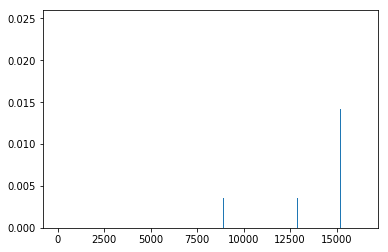

In [15]:
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()